In [1]:
# See https://keras.io/applications for details
from tensorflow.python.keras.applications.vgg16 import VGG16, decode_predictions, preprocess_input
model = VGG16()

# Other models to try:
# from tensorflow.python.keras.applications.vgg19 import VGG19, decode_predictions, preprocess_input
# from tensorflow.python.keras.applications.resnet50 import ResNet50, decode_predictions, preprocess_input
# from tensorflow.python.keras.applications.densenet import DenseNet121, decode_predictions, preprocess_input
# from tensorflow.python.keras.applications.densenet import DenseNet169, decode_predictions, preprocess_input
# from tensorflow.python.keras.applications.densenet import DenseNet201, decode_predictions, preprocess_input

553467904/553467096 [==============================] - 27s 0us/step


In [2]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [3]:
# Uncomments to look at the model's weights. It's a list of very large tensors!
# model.weights

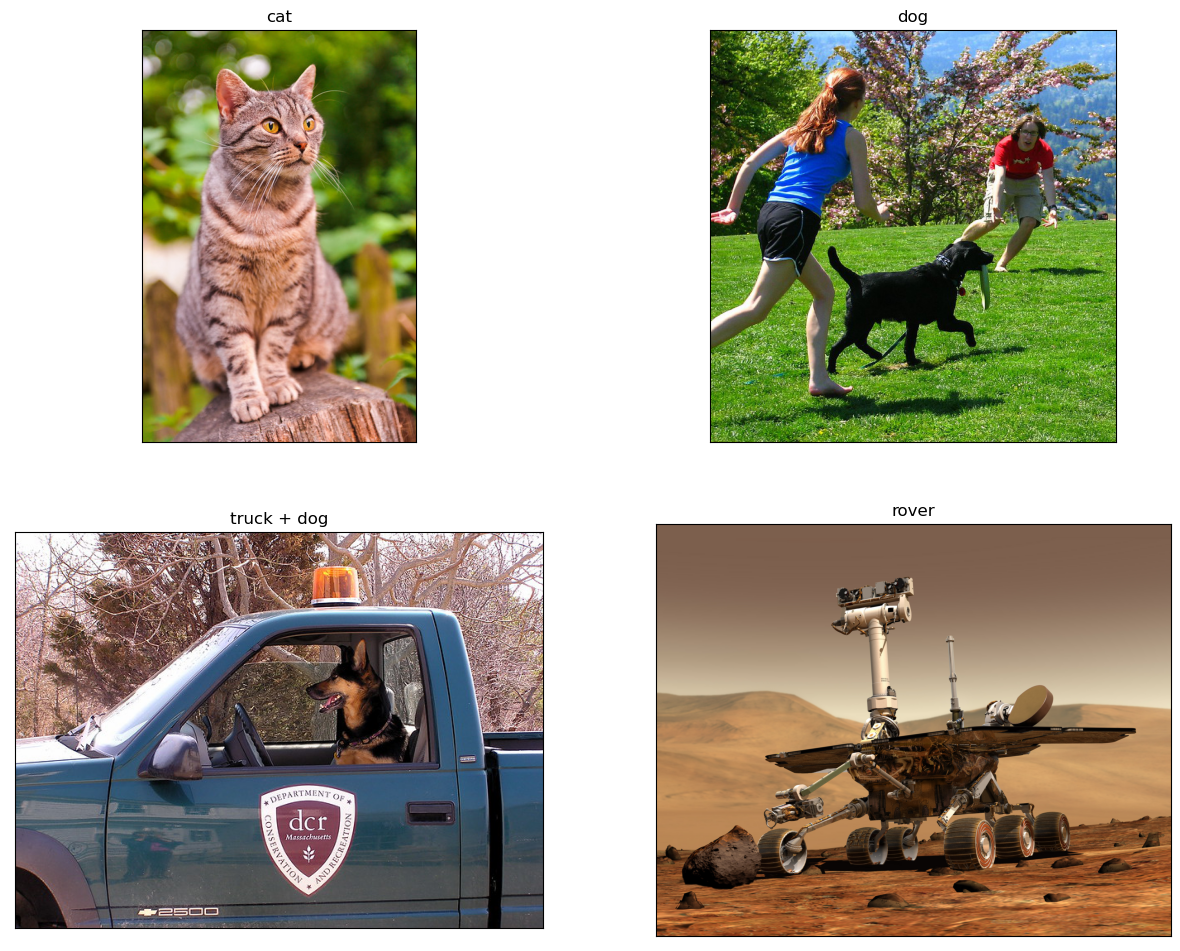

In [4]:
%matplotlib inline
from utils.plot import plot_image, load_tiny_batch, plot_images_grid

# Loads a tiny batch of images from Internet
images_raw = load_tiny_batch()
plot_images_grid(images_raw)

In [5]:
import numpy as np
from utils import crop_and_resize_for_imagenet

# Cropped and/or resized into ImageNet shape 224x244x3 array of type uint8 [0, 255]
images_resized = np.array([crop_and_resize_for_imagenet(i) for i in images_raw.values()])

# Rescaled RGB distribution to match ImageNet
images_rescaled = preprocess_input(images_resized)

ImportError: cannot import name 'crop_and_resize_for_imagenet' from 'utils' (unknown location)

In [ ]:
import pandas as pd

# Returns shape (?, 1000) array of floats
predictions_raw = model.predict(images_rescaled)

# Fetch list of top-5 likelihood labels
decoded_top5 = decode_predictions(predictions_raw, top=5)

report_by_name = {
    name: pd.DataFrame(
        prediction, 
        columns=['class ID', 'class label', 'probability']
    )
    for name, prediction in zip(images_raw.keys(), decoded_top5)
}

In [ ]:
# Displays the model's predicted classes.

plot_image(images_raw['cat'])
report_by_name['cat']

In [ ]:
# People were not one of the classes in ImageNet 1K

plot_image(images_raw['dog'])
report_by_name['dog']

In [ ]:
# The model was not able to find the dog, only the truck.

plot_image(images_raw['truck + dog'])
report_by_name['truck + dog']

In [ ]:
# Rovers are definitely not one of the 1K classes in ImageNet.
# It is insightful to see what the models thinks the rover looks like, though.

plot_image(images_raw['rover'])
report_by_name['rover']